In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [22]:
"""Exercise 1"""
from sklearn.model_selection import train_test_split


airbnb = pd.read_csv('C:/Users/adril/Desktop/Módulos KC/Machine-Learning-101/Proyecto/airbnb-listings-extract.csv', sep=';') #transformo el csv en dataframe

airbnb_train, airbnb_test = train_test_split(airbnb, test_size=0.2, shuffle=True, random_state=0)

airbnb_train.to_csv('C:/Users/adril/Desktop/Módulos KC/Machine-Learning-101/data/airbnb_train.csv', sep=';', decimal='.', index=False)
airbnb_test.to_csv('C:/Users/adril/Desktop/Módulos KC/Machine-Learning-101/data/airbnb_test.csv', sep=';', decimal='.', index=False)

print(f'Dimensiones del dataset de training: {airbnb_train.shape}')
print(f'Dimensiones del dataset de test: {airbnb_test.shape}')

airbnb_train = pd.read_csv('C:/Users/adril/Desktop/Módulos KC/Machine-Learning-101/data/airbnb_train.csv', sep=';', decimal='.')


Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [23]:
"""Exercise 2"""
"""a) Head, describe, dtypes"""
# Imprimo los diferentes registros donde podemos ver los datos dentro del dataframe
print("Print head")
print(airbnb_train.head())
print("Print describe")
print(airbnb_train.describe())
print("Print dtypes")
print(airbnb_train.dtypes)

Print head
         ID                            Listing Url       Scrape ID  \
0   5994463   https://www.airbnb.com/rooms/5994463  20170407214119   
1  14136180  https://www.airbnb.com/rooms/14136180  20170407214119   
2  15520134  https://www.airbnb.com/rooms/15520134  20170407214119   
3   8809721   https://www.airbnb.com/rooms/8809721  20170407214119   
4   1162707   https://www.airbnb.com/rooms/1162707  20170407214119   

  Last Scraped                                            Name  \
0   2017-04-08                PISO ATOCHA- FLAT NEAR ATOCHA  .   
1   2017-04-08                          The Palace Sol Madrid.   
2   2017-04-08  por persona la noche metro linea5 vista alegre   
3   2017-04-08             CITY CENTER JACINTO BENAVENTE ROOM4   
4   2017-04-08              NICE & BIG DOUBLE ROOM AT DOWNTOWN   

                                             Summary  \
0  Piso recién reformado cómoda habitación con ba...   
1  Lugares de interés: Plaza Mayor, Plaza del Sol...   
2  

Outliers de Price: 748
46     188.0
87     200.0
95     403.0
137    175.0
145    200.0
Name: Price, dtype: float64


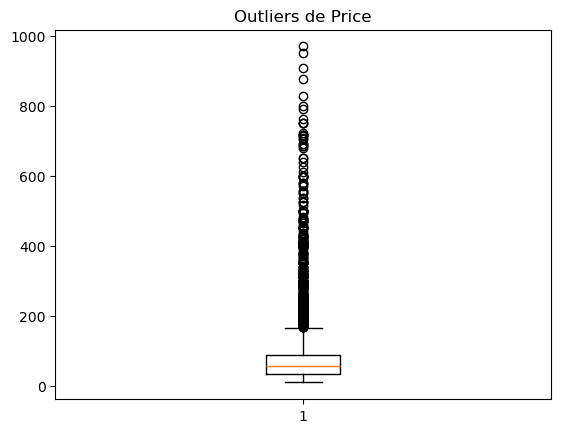

In [24]:
"""Exercise 2"""
"""b) Outliers"""

import numpy as np
import matplotlib.pyplot as plt

#creo función que me de los outliers con cuartiles y después con el mask marco con booleanos 
#los que están por fuera de los limites y con el col[mask] cojo solo los valores que estén fuera

def outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    mask = (col < Q1 - 1.5*IQR) | (col > Q3 + 1.5*IQR)
    return col[mask]

outdeprice = outliers(airbnb_train['Price'])
print("Outliers de Price:", outdeprice.shape[0]) #veo cuantos outliers hay
print(outdeprice.head()) # marco cuantos otliers hay en cada precio
plt.boxplot(airbnb_train['Price'].dropna()) #pinto un boxplot de price para ver los outliers y quito los valores NA
plt.title("Outliers de Price")
plt.show()

                                      ID  Scrape ID   Host ID  \
ID                              1.000000   0.032498  0.613624   
Scrape ID                       0.032498   1.000000  0.039500   
Host ID                         0.613624   0.039500  1.000000   
Host Response Rate              0.009607   0.008985 -0.026647   
Host Listings Count            -0.020606   0.009986 -0.072197   
Host Total Listings Count      -0.020606   0.009986 -0.072197   
Latitude                       -0.013738  -0.029580 -0.009523   
Longitude                       0.029964   0.158077  0.020668   
Accommodates                   -0.091817  -0.005194 -0.100388   
Bathrooms                      -0.066622   0.000925 -0.058610   
Bedrooms                       -0.064048  -0.005617 -0.075542   
Beds                           -0.100904   0.005618 -0.075086   
Square Feet                    -0.016243  -0.125935  0.014980   
Price                          -0.040946  -0.056473 -0.052158   
Weekly Price             

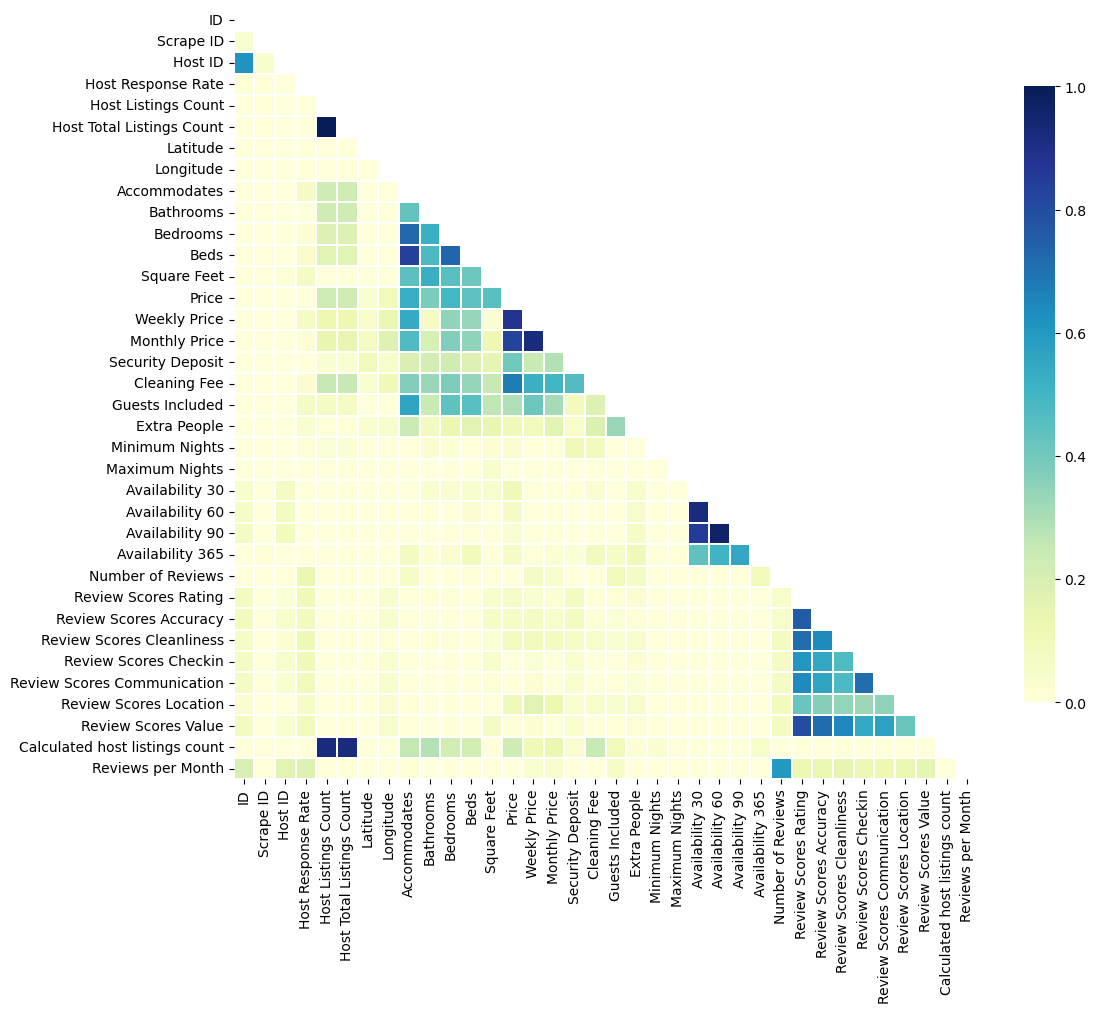

In [25]:
"""Exercise 2"""
"""c) Correlación"""

num_airbnb = airbnb_train.select_dtypes(include='number') #filtro las columnas que sólo tengan datos numéricos, así no tengo fallos en la correlación

print(num_airbnb.corr())

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(num_airbnb).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [26]:
"""Exercise 3"""
# Elimino columnas con un 30% de valores NA, si son menos de 30% imputaré valores

media_nulos = airbnb_train.isnull().mean() # hallo la media de nulos de cada columna
cols_a_borrar = media_nulos[media_nulos > 0.3].index # selecciono las columnas con más de 0.3
airbnb_limpio1 = airbnb_train.drop(columns=cols_a_borrar) # quito las columnas seleccionadas

# Elimino columnas con alta correlación

matriz_corr = airbnb_limpio1.select_dtypes(include='number').corr().abs() #hallo matriz de correlacion

# creo array de unos, con .triu y k=1 convierto en 0s la diagonal y lo que haya debajo después convierto
# en booleanos y finalmente cojo solo los elementos True de dentro de la matriz. Así no cojo dos veces dos valores que se comparan

triang_superior = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(bool)) 

cols_corr_borrar = [x for x in triang_superior.columns if any(triang_superior[x] > 0.9)] # si el valor es mayor a 0.9 meto la columna en cols_corr_borrar
airbnb_limpio2 = airbnb_limpio1.drop(columns=cols_corr_borrar) # elimino las cols seleccionadas

#airbnb_limpio2 tiene limpios las col con mas de 30% de NA y las col con una correlacion mayor de 0.9. pero mantiene las columnas no numericas

In [27]:
"""Exercise 3"""
"""Antes de codificar voy a imputar valores"""
"""Generación de variables mediante imputacion"""

#IMPUTO NUMERICAS
num_nulas = airbnb_limpio2.select_dtypes(include="number").columns[airbnb_limpio2.select_dtypes(include="number").isnull().any()] #col numericas y con nulls
median_vals = airbnb_limpio2[num_nulas].median() #hallo mediana
airbnb_limpio2[num_nulas] = airbnb_limpio2[num_nulas].fillna(median_vals) #imputo mediana

# CATEGORICAS, primero quito si tienen mas de 5 tipos de valores, después imputo.
Drop_cols = []
for x in airbnb_limpio2.select_dtypes(include="object").columns: # Meto en una lista las columnas no numericas con más de 5 tipos de valores
    if airbnb_limpio2[x].nunique() > 5:
        Drop_cols.append(x)
airbnb_limpio3 = airbnb_limpio2.drop(columns=Drop_cols) # quito las columnas object con más de 5 valores diferentes

cat_nulas = airbnb_limpio3.select_dtypes(include="object").columns[airbnb_limpio3.select_dtypes(include="object").isnull().any()] #col objetc y con nulls
mode_vals = airbnb_limpio3[cat_nulas].mode().iloc[0] #hallo moda
airbnb_limpio4 = airbnb_limpio3
airbnb_limpio4[cat_nulas] = airbnb_limpio3[cat_nulas].fillna(mode_vals) #imputo moda 

In [28]:
"""Exercise 3"""
"""Codifico las columnas object mediante one-hot"""

cols_encode = airbnb_limpio4.select_dtypes(include="object").columns.tolist() #selecciono las columnas object que voy a codificar

airbnb_limpio5 = pd.get_dummies(airbnb_limpio4, columns=cols_encode, drop_first=True) # airbnb_limpio5 tiene las columnas object restantes ya codificadas

In [29]:
"""Exercise 3"""
"""Escalar los datos"""
from sklearn.preprocessing import StandardScaler

#Creo X e y
X_train = airbnb_limpio5.drop(columns=['Price'])
y_train = airbnb_limpio5['Price']

#Escalo datos
scaler = StandardScaler().fit(X_train) #scaler ya entrenado, será el mismo que usaré en test
XtrainScaled = scaler.transform(X_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
best mean cross-validation score: -3099.019
best parameters: {'alpha': 0.1}


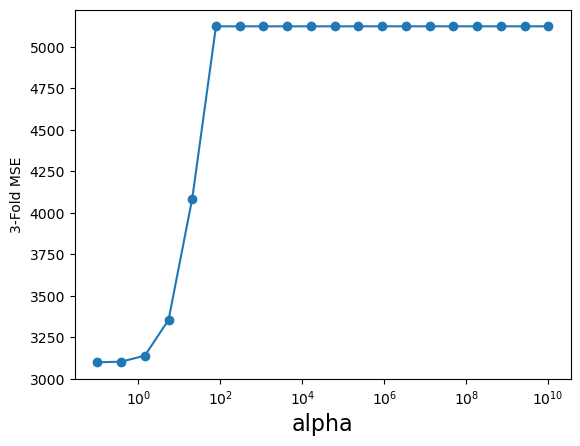

In [30]:
"""Exercise 3"""
"""Hallar mejor alpha"""
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }

grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2, n_jobs=-1)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [31]:
"""Entreno  Lasso"""
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))

feature_names = X_train.columns.tolist() # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 3.05e+03
RMSE Modelo Lasso (train): 55.2
ID -1.0872657395954315
Scrape ID -3.3590269122009646
Host ID 1.2004150332133832
Host Response Rate 0.46361933690151846
Host Listings Count 4.959549356145427
Latitude -1.7313512648474396
Longitude -1.5920554288040798
Accommodates 18.920541497183866
Bathrooms 11.544199341211607
Bedrooms 13.705106044040473
Beds -5.421147499130889
Guests Included -0.28555540620096515
Extra People -1.5684584950524705
Minimum Nights 0.4045691546513068
Maximum Nights -0.08159959133876916
Availability 30 11.074304815571011
Availability 365 -0.9777008727790035
Number of Reviews -0.0
Review Scores Rating 4.141532347667906
Review Scores Accuracy 2.9176354701879577
Review Scores Cleanliness 3.149603508564744
Review Scores Checkin -0.009790871818187623
Review Scores Communication -0.9542113480176232
Review Scores Location 5.509904187490104
Review Scores Value -5.086265549084873
Reviews per Month -5.146927444424447
Experiences Offered_family -0.14165

In [32]:
"""Seleccionar variables más útiles"""

coef_series = pd.Series(data=lasso.coef_, index=X_train.columns)

# Selección de todas las variables que no han quedado a cero  
selected_features = coef_series[coef_series != 0].index.tolist()
print("Variables seleccionadas (coef ≠ 0):", selected_features)

# Ranking por magnitud absoluta y top-k
top_k = 10
top10 = coef_series.abs().sort_values(ascending=False).head(top_k).index.tolist()
print(f"Top {top_k} variables por magnitud de coeficiente:", top10)


Variables seleccionadas (coef ≠ 0): ['ID', 'Scrape ID', 'Host ID', 'Host Response Rate', 'Host Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 365', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Experiences Offered_family', 'Experiences Offered_none', 'Experiences Offered_romantic', 'Experiences Offered_social', 'Host Response Time_within a day', 'Host Response Time_within a few hours', 'Room Type_Private room', 'Room Type_Shared room', 'Bed Type_Couch', 'Bed Type_Futon', 'Bed Type_Real Bed']
Top 10 variables por magnitud de coeficiente: ['Accommodates', 'Room Type_Private room', 'Bedrooms', 'Bathrooms', 'Availability 30', 'Room Type_Shared room', 'Review Scores Location', 'Beds', 'Re

In [33]:
"""Recreo X_train ahora solo con las variables escogidas por el método Lasso"""
X_train2 = airbnb_limpio5[top10]

#Vuelvo a aplicarle el escalado, así el scaler2 preparado para esas 10 variables es el que aplicaré en test
scaler2 = StandardScaler().fit(X_train2) #scaler ya entrenado, será el mismo que usaré en test
XtrainScaled2 = scaler2.transform(X_train2)

In [34]:
#Modelado
alpha_vector = np.logspace(-1, 10, 20)
param_grid   = {'alpha': alpha_vector}

grid = GridSearchCV(Lasso(max_iter=10000),param_grid=param_grid,scoring='neg_mean_squared_error',cv=3,verbose=2,n_jobs=-1)
grid.fit(XtrainScaled2, y_train)

modelo_final = grid.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [35]:
"""Comprobar Alpha optimo y RMSE"""
from sklearn.model_selection import cross_val_score

modelo_final = grid.best_estimator_  # alpha = 0.1)

scores = cross_val_score(modelo_final,XtrainScaled2, y_train,cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1)
rmse = -scores
print("Alpha optimo:", modelo_final.alpha)
print(f"RMSE medio: {rmse.mean():.2f} ± {rmse.std():.2f}")

Alpha optimo: 0.1
RMSE medio: 56.04 ± 3.17


In [40]:
"""TODOS LOS PASOS"""
#CARGA
airbnb_train = pd.read_csv('C:/Users/adril/Desktop/Módulos KC/Machine-Learning-101/data/airbnb_train.csv', sep=';', decimal='.')

#LIMPIEZA NULOS Y ALTA CORRELACION
media_nulos = airbnb_train.isnull().mean()
cols_a_borrar = media_nulos[media_nulos > 0.3].index
airbnb_limpio1 = airbnb_train.drop(columns=cols_a_borrar)
matriz_corr = airbnb_limpio1.select_dtypes(include='number').corr().abs()
triang_superior = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(bool)) 
cols_corr_borrar = [x for x in triang_superior.columns if any(triang_superior[x] > 0.9)]
airbnb_limpio2 = airbnb_limpio1.drop(columns=cols_corr_borrar)

#IMPUTACION COLS NUMERICAS
num_nulas = airbnb_limpio2.select_dtypes(include="number").columns[airbnb_limpio2.select_dtypes(include="number").isnull().any()] #col numericas y con nulls
median_vals = airbnb_limpio2[num_nulas].median()
airbnb_limpio2[num_nulas] = airbnb_limpio2[num_nulas].fillna(median_vals)

#LIMPIEZA E IMPUTACION COLs CATEGORICAS 
Drop_cols = []
for x in airbnb_limpio2.select_dtypes(include="object").columns:
    if airbnb_limpio2[x].nunique() > 5:
        Drop_cols.append(x)
airbnb_limpio3 = airbnb_limpio2.drop(columns=Drop_cols)
cat_nulas = airbnb_limpio3.select_dtypes(include="object").columns[airbnb_limpio3.select_dtypes(include="object").isnull().any()]
mode_vals = airbnb_limpio3[cat_nulas].mode().iloc[0]
airbnb_limpio4 = airbnb_limpio3
airbnb_limpio4[cat_nulas] = airbnb_limpio3[cat_nulas].fillna(mode_vals)

#ONE-HOT ENCODING
cols_encode = airbnb_limpio4.select_dtypes(include="object").columns.tolist()
airbnb_limpio5 = pd.get_dummies(airbnb_limpio4, columns=cols_encode, drop_first=True)

#CREO X e Y, ESCALO X
X_train = airbnb_limpio5.drop(columns=['Price'])
y_train = airbnb_limpio5['Price']
scaler = StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

#SELECCIÓN CON LASSO
alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2, n_jobs=-1)
grid.fit(XtrainScaled, y_train)
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)
coef_series = pd.Series(data=lasso.coef_, index=X_train.columns)
selected_features = coef_series[coef_series != 0].index.tolist()
top_k = 10
top10 = coef_series.abs().sort_values(ascending=False).head(top_k).index.tolist()

#RECREO X_train Y LO ESCALO
X_train2 = airbnb_limpio5[top10]
scaler2 = StandardScaler().fit(X_train2)
XtrainScaled2 = scaler2.transform(X_train2)

#MODELADO
alpha_vector = np.logspace(-1, 10, 20)
param_grid   = {'alpha': alpha_vector}
grid = GridSearchCV(Lasso(max_iter=10000),param_grid=param_grid,scoring='neg_mean_squared_error',cv=3,verbose=2,n_jobs=-1)
grid.fit(XtrainScaled2, y_train)
modelo_final = grid.best_estimator_ #valor para el test

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [41]:
"""Aplico cambios de train a test"""
airbnb_test = pd.read_csv('C:/Users/adril/Desktop/Módulos KC/Machine-Learning-101/data/airbnb_test.csv', sep=';', decimal='.')

#Limpieza de null y correlacion
media_nulos = airbnb_train.isnull().mean()
cols_a_borrar = media_nulos[media_nulos > 0.3].index
airbnb_test = airbnb_test.drop(columns=cols_a_borrar)
matriz_corr = airbnb_limpio1.select_dtypes(include='number').corr().abs()
triang_superior = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(bool)) 
cols_corr_borrar = [x for x in triang_superior.columns if any(triang_superior[x] > 0.9)]
airbnb_test = airbnb_test.drop(columns=cols_corr_borrar)

#Imputacion
#Imput de numericas
num_nulas = airbnb_test.select_dtypes(include="number").columns[airbnb_test.select_dtypes(include="number").isnull().any()]
median_vals = airbnb_limpio2[num_nulas].median()
airbnb_test[num_nulas] = airbnb_test[num_nulas].fillna(median_vals)

#Limpieza si hay mas de 5 categorias
Drop_cols = []
for x in airbnb_limpio2.select_dtypes(include="object").columns:
    if airbnb_limpio2[x].nunique() > 5:
        Drop_cols.append(x)
airbnb_test = airbnb_test.drop(columns=Drop_cols)

#Imput de categoricas
cat_nulas = airbnb_test.select_dtypes(include="object").columns[airbnb_test.select_dtypes(include="object").isnull().any()]
mode_vals = airbnb_limpio3[cat_nulas].mode().iloc[0]
airbnb_test[cat_nulas] = airbnb_test[cat_nulas].fillna(mode_vals)

#ONE-HOT ENCODING
cols_encode = airbnb_limpio4.select_dtypes(include="object").columns.tolist()
airbnb_test = pd.get_dummies(airbnb_test, columns=cols_encode, drop_first=True)

#CREO X (CON EL TOP DE COLUMNAS QUE HALLÉ CON LASSO EN TRAIN) E Y
X_test = airbnb_test[top10]
y_test = airbnb_test["Price"]

#ESCALO
XtestScaled = scaler2.transform(X_test)

#Predecir con test
y_pred_test = modelo_final.predict(XtestScaled)



In [44]:
"""Comparación realidad y predicción"""
resultados = pd.DataFrame({'Real': y_test,'Prediccion': y_pred_test})

print(resultados.head())

   Real  Prediccion
0  15.0   17.512216
1  25.0   21.476402
2  45.0   71.324453
3  25.0   56.032215
4  40.0   53.539262


Mi conclusión es que tal y como podemos ver en los "resultados" la predicción se acerca bastante a la realidad, con desviaciones más grandes en algunos casos 
pero siempre dentro de un rango de error aceptable. Quizás si hubiera elegido más columnas en vez de sólo 10 la aproximación hubiera sido aún mayor.
PD. Siento el desorden en el código, he intentado dejarlo lo más claro posible